In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.8 #allowing tensorflow to access 80% of my GPU
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
tf.__version__

'2.3.0'

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


In [5]:
training_set = train_datagen.flow_from_directory('C:/Users/Administrator/animal_bird_classification/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')
# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('C:/Users/Administrator/animal_bird_classification/val',
                                           target_size = (64, 64),
                                          batch_size = 32,
                                         class_mode = 'binary') 


Found 8400 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [6]:
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor='loss', patience=5,restore_best_weights=True) 
# This callback will stop the training when the is loss value isn't improving anymore for 5 epochs

In [7]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense

In [8]:
from tensorflow.keras.regularizers import l2

In [9]:

cnn = tf.keras.models.Sequential()
# Adding 4 convolutional layers with different neurons
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))

cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
#Flattening the input tensors
cnn.add(tf.keras.layers.Flatten())

#Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
#since this is binary classification hence 1 nuerons
cnn.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation='linear'))

In [10]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 64)          3

In [11]:

cnn.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])
# hinge loss function is used here since we are using linear SVM in the output layer
r=cnn.fit(x = training_set,validation_data = test_set, epochs = 100,verbose=1,callbacks=[callback])

Epoch 1/100
263/263 [==============================] - 27s 102ms/step - loss: 0.9713 - accuracy: 0.5230 - val_loss: 0.7769 - val_accuracy: 0.6483
Epoch 2/100
263/263 [==============================] - 26s 98ms/step - loss: 0.7508 - accuracy: 0.6438 - val_loss: 0.7749 - val_accuracy: 0.6617
Epoch 3/100
263/263 [==============================] - 26s 97ms/step - loss: 0.6809 - accuracy: 0.6825 - val_loss: 0.6209 - val_accuracy: 0.7067
Epoch 4/100
263/263 [==============================] - 23s 88ms/step - loss: 0.6295 - accuracy: 0.6996 - val_loss: 0.5717 - val_accuracy: 0.7300
Epoch 5/100
263/263 [==============================] - 23s 87ms/step - loss: 0.6209 - accuracy: 0.7019 - val_loss: 0.6238 - val_accuracy: 0.7133
Epoch 6/100
263/263 [==============================] - 23s 88ms/step - loss: 0.6083 - accuracy: 0.7106 - val_loss: 0.6816 - val_accuracy: 0.6750
Epoch 7/100
263/263 [==============================] - 23s 87ms/step - loss: 0.6024 - accuracy: 0.7129 - val_loss: 0.5816 - val_a

Epoch 57/100
263/263 [==============================] - 28s 108ms/step - loss: 0.3396 - accuracy: 0.8338 - val_loss: 0.4006 - val_accuracy: 0.8100
Epoch 58/100
263/263 [==============================] - 28s 108ms/step - loss: 0.3489 - accuracy: 0.8304 - val_loss: 0.3999 - val_accuracy: 0.8083
Epoch 59/100
263/263 [==============================] - 28s 108ms/step - loss: 0.3505 - accuracy: 0.8288 - val_loss: 0.3985 - val_accuracy: 0.8067
Epoch 60/100
263/263 [==============================] - 28s 107ms/step - loss: 0.3842 - accuracy: 0.8146 - val_loss: 0.4305 - val_accuracy: 0.7950
Epoch 61/100
263/263 [==============================] - 28s 107ms/step - loss: 0.3583 - accuracy: 0.8261 - val_loss: 0.4801 - val_accuracy: 0.7800
Epoch 62/100
263/263 [==============================] - 28s 107ms/step - loss: 0.3491 - accuracy: 0.8320 - val_loss: 0.4201 - val_accuracy: 0.7983


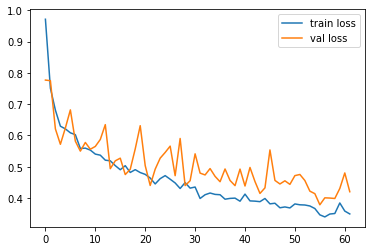

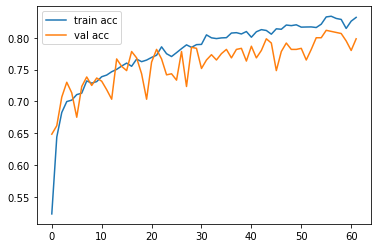

<Figure size 432x288 with 0 Axes>

In [12]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [29]:
from tensorflow.keras.models import load_model

cnn.save('dc1.h5')

In [30]:
from tensorflow.keras.models import load_model

model = load_model('dc1.h5')

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 64)          3

In [32]:
import numpy as np
from tensorflow.keras.preprocessing import image
d="C:/Users/Administrator/Downloads/PetImages/Cat/11900.jpg"
test_image = image.load_img(d, target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

In [33]:
from PIL import Image 
im = Image.open(r"{}".format(d)) 
im.show()

In [34]:
result
dd=result.flatten()
res=dd.tolist()
res

[-1.0836522579193115]

In [35]:
if result[0]<0:
    print("cat")
else:
    print("dog")

cat
